In [1]:
import numpy as np
import pandas as pd

In [2]:
data_full = pd.read_csv('books.csv',on_bad_lines='skip')

In [3]:
data_st1=data_full[np.mean( data_full['ratings_count'])*0.01<=data_full['ratings_count']]

In [4]:
data_st1.reset_index(drop=True,inplace=True)

In [5]:
data_st2 = data_st1[['  num_pages','authors','publisher','average_rating']]

In [6]:
pages=data_st2['  num_pages'].to_numpy(dtype='int')

In [7]:
rat=data_st2['average_rating'].to_numpy(dtype='float')

In [8]:
data_rat= pd.DataFrame(map(lambda x: 'good' if x>=rat.mean() else 'not so good',rat),dtype='str')

In [9]:
data_size= pd.DataFrame( map(lambda x: 'big' if x>=pages.mean() else 'small',pages))

In [10]:
# auths = list(map(lambda x :tuple(x.split("/")), data_st2['authors']))

In [11]:
# pubs = list(map(lambda x :tuple(x.split("/")), data_st2['publisher']))

In [12]:
data_st2["quality"]=data_rat

/tmp/ipykernel_2228/2934830008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st2["quality"]=data_rat


In [13]:
data_st2["size"]=data_size

/tmp/ipykernel_2228/1685425713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st2["size"]=data_size


In [14]:
data_st2

,num_pages,authors,publisher,average_rating,quality,size
0,652,J.K. Rowling/Mary GrandPré,Scholastic Inc.,4.57,good,big
1,870,J.K. Rowling/Mary GrandPré,Scholastic Inc.,4.49,good,big
2,352,J.K. Rowling,Scholastic,4.42,good,small
3,435,J.K. Rowling/Mary GrandPré,Scholastic Inc.,4.56,good,big
4,2690,J.K. Rowling/Mary GrandPré,Scholastic,4.78,good,big
...,...,...,...,...,...,...
7694,160,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,Editorial Presença,3.97,good,small
7695,160,William T. Vollmann,Penguin Books,3.69,not so good,small
7696,635,William T. Vollmann,Penguin Books,4.08,good,big
7697,415,William T. Vollmann,Penguin Books,3.96,good,big


In [ ]:
# data_st2["authors"]=auths

NameError: name 'auths' is not defined

In [31]:
# data_st2["publisher"]=pubs

/tmp/ipykernel_18002/1880527508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st2["publisher"]=pubs


In [17]:
data=data_st2.drop(columns=["average_rating","  num_pages"])

In [23]:
data

,authors,publisher,quality,size
0,J.K. Rowling/Mary GrandPré,Scholastic Inc.,good,big
1,J.K. Rowling/Mary GrandPré,Scholastic Inc.,good,big
2,J.K. Rowling,Scholastic,good,small
3,J.K. Rowling/Mary GrandPré,Scholastic Inc.,good,big
4,J.K. Rowling/Mary GrandPré,Scholastic,good,big
...,...,...,...,...
7694,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,Editorial Presença,good,small
7695,William T. Vollmann,Penguin Books,not so good,small
7696,William T. Vollmann,Penguin Books,good,big
7697,William T. Vollmann,Penguin Books,good,big


In [24]:
from collections import defaultdict

class NaiveBayes:
    def __init__(self):
        self.prior_probs = {}
        self.conditional_probs = defaultdict(dict)
        self.classes = None

    def fit(self, X, y):
        self.classes, class_counts = np.unique(y, return_counts=True)
        total_samples = len(y)
        
        # Compute prior probabilities P(class)
        self.prior_probs = {cls: count / total_samples for cls, count in zip(self.classes, class_counts)}
        
        # Compute conditional probabilities P(feature | class)
        for cls in self.classes:
            X_cls = X[y == cls]
            
            for feature in X.columns:
                values, counts = np.unique(X_cls[feature], return_counts=True)
                self.conditional_probs[cls][feature] = {val: count / len(X_cls) for val, count in zip(values, counts)}
    
    def predict(self, X):
        predictions = []
        
        for _, row in X.iterrows():
            class_probs = {}
            
            for cls in self.classes:
                prob = np.log(self.prior_probs[cls])  # Start with prior probability
                
                for feature in X.columns:
                    feature_value = row[feature]
                    
                    # Use Laplace smoothing if the feature value is missing
                    feature_probs = self.conditional_probs[cls].get(feature, {})
                    prob += np.log(feature_probs.get(feature_value, 1e-6))
                
                class_probs[cls] = prob
            
            predictions.append(max(class_probs, key=class_probs.get))
        
        return np.array(predictions)
    
# Load your dataset (example: Pandas DataFrame)
# data = pd.read_csv("your_data.csv")

# Encode categorical features manually
for col in ["publisher", "size", "authors"]:
    data[col] = data[col].astype("category").cat.codes

X = data.drop(columns=["quality"])
y = data["quality"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
# nb = NaiveBayes()
# nb.fit(X_train, y_train)

# Predictions
# y_pred = nb.predict(X_test)

# Accuracy
# accuracy = np.mean(y_pred == y_test)
# print("Accuracy:", accuracy)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
nb = NaiveBayes()
nb.fit(X_train, y_train)

In [27]:
y_pred = nb.predict(X_test)


In [29]:
# Accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6701298701298701


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [84]:
from sklearn.preprocessing import MultiLabelBinarizer




# Encode other categorical variables
label_encoders = {}
for col in ["publisher","size","quality", "authors"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store for inverse transform

# Split data
X = data.drop(columns=["quality"])  # Features
y = data["quality"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5487012987012987


In [85]:
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("New Accuracy:", accuracy)

New Accuracy: 0.6701298701298701


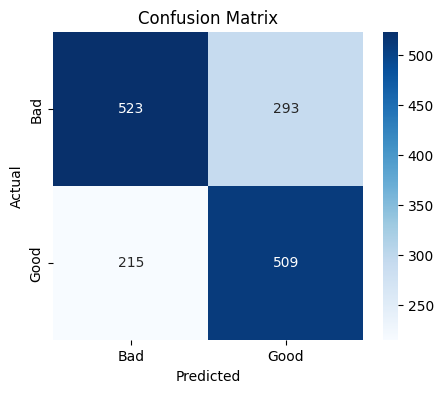

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
